**Librerias**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Cargar datos**

In [2]:
df =  pd.read_excel("../data/raw/REPORTE_RECORD_ESTUDIANTIL_ANONIMIZADO.xlsx")

**Convertir PROMEDIO a numérico**

In [5]:
df["PROMEDIO"] = (df["PROMEDIO"].astype(str).str.replace(",", ".", regex=False).astype(float))

In [ ]:
# Guardar datos con la transformación del promedio
df.to_excel("../data/interim/REPORTE_RECORD_ESTUDIANTIL_ANONIMIZADO.xlsx", index=False)

In [7]:
desc_stats = df[["PROMEDIO", "ASISTENCIA", "NO. VEZ", "NIVEL"]].describe()
print("\t\tEstadísticas descriptivas\n")
print(desc_stats)

		Estadísticas descriptivas

          PROMEDIO   ASISTENCIA      NO. VEZ        NIVEL
count  4448.000000  4448.000000  4448.000000  4448.000000
mean      7.649649    82.223921     1.053507     1.707284
std       2.704142    33.960853     0.246981     0.898852
min       0.000000     0.000000     0.000000     1.000000
25%       7.430000    89.000000     1.000000     1.000000
50%       8.530000   100.000000     1.000000     1.000000
75%       9.310000   100.000000     1.000000     2.000000
max      10.000000   100.000000     3.000000     4.000000


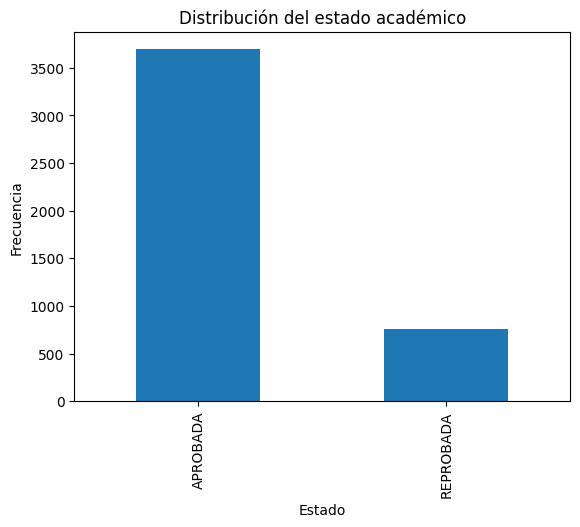

In [8]:
estado_counts = df["ESTADO"].value_counts()
plt.figure()
estado_counts.plot(kind="bar")
plt.title("Distribución del estado académico")
plt.xlabel("Estado")
plt.ylabel("Frecuencia")
plt.show()

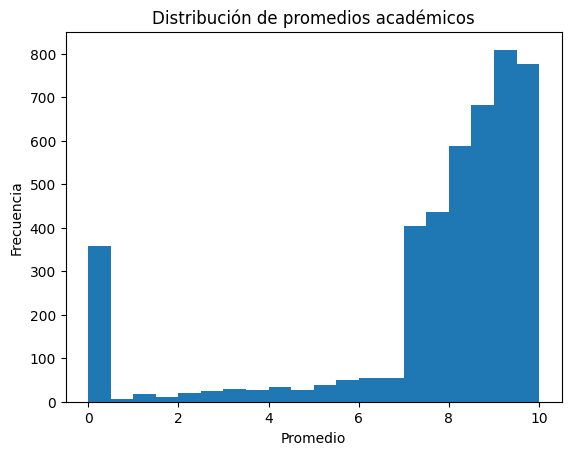

In [9]:
plt.figure()
plt.hist(df["PROMEDIO"].dropna(), bins=20)
plt.title("Distribución de promedios académicos")
plt.xlabel("Promedio")
plt.ylabel("Frecuencia")
plt.show()

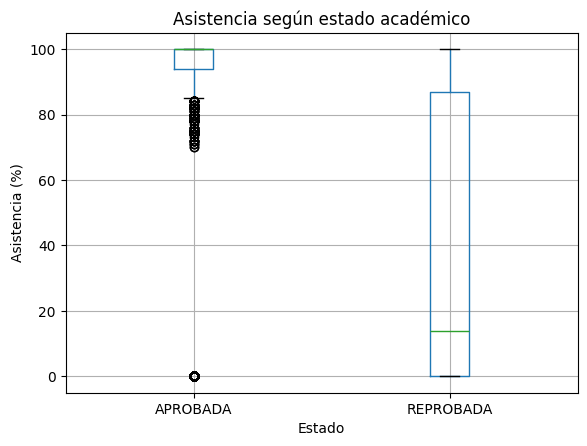

In [10]:
df.boxplot(column="ASISTENCIA", by="ESTADO")
plt.title("Asistencia según estado académico")
plt.suptitle("")
plt.xlabel("Estado")
plt.ylabel("Asistencia (%)")
plt.show()

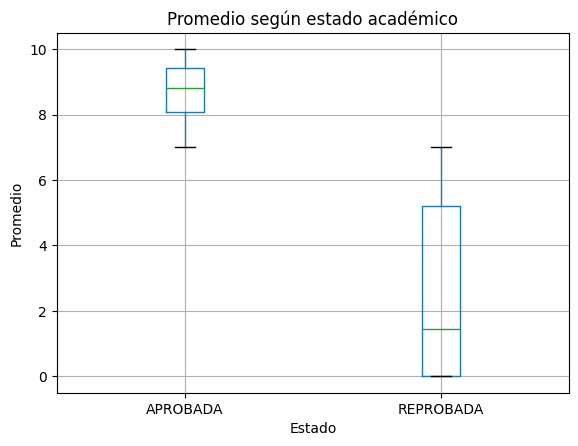

In [11]:
df.boxplot(column="PROMEDIO", by="ESTADO")
plt.title("Promedio según estado académico")
plt.suptitle("")
plt.xlabel("Estado")
plt.ylabel("Promedio")
plt.show()

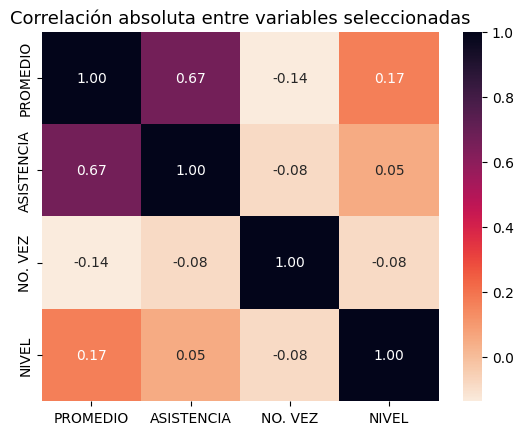

In [12]:
corr = df[["PROMEDIO", "ASISTENCIA", "NO. VEZ", "NIVEL"]].corr()
sns.heatmap(corr, cmap="rocket_r", annot=True, fmt=".2f")
plt.title("Correlación absoluta entre variables seleccionadas", fontsize=13)
plt.show()

Asistencia es una variable muy potente para deserción.

**Conclusión**

El análisis exploratorio evidencia patrones consistentes de riesgo académico asociados a bajo promedio, baja asistencia, repitencia y primeros niveles de formación. Estas variables muestran una alta capacidad discriminativa entre estudiantes aprobados y reprobados, lo que confirma la idoneidad del conjunto de datos para el desarrollo de modelos predictivos de deserción estudiantil.

**Variables relevantes para la deserción estudiantil**

- PROMEDIO: bajo rendimiento académico es uno de los predictores más fuertes.

- ASISTENCIA: niveles bajos suelen correlacionarse con abandono.

- NO. VEZ: la repitencia incrementa el riesgo de deserción.

- ESTADO: reprobaciones consecutivas son una señal temprana.

- NIVEL: los primeros niveles presentan mayor vulnerabilidad.